In [1]:
# Import section
import numpy as np
import pandas as pd

from scipy.optimize import minimize

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
%matplotlib inline

### -1- load the data

Занесем данные рейтинга студентов из hw_date.csv файла в датафрейм hw.  
Данные содержат следующие столбцы:

* lesson number: Номер занятия.
* homework done: Количество сделанных домашних задании.
* number students: Количество студентов присуствующих на занятии.
* complexity task: Сложность занятия (мнимые данные для регрессии с несколькими переменными).

In [2]:
# Read in the hw_date.csv file as a DataFrame called hw.
hw = pd.read_csv("hw_date.csv")
hw

,lesson number,homework done,number students,complexity task
0,1,5,8,10
1,2,9,9,20
2,3,7,8,30
3,4,3,7,40


In [3]:
# load the data and turn X and y into numpy arrays
# В данном задании не будем разбивать данные на тренировочные и тестовые

# inputs / Массив X, содержит признаки для обучения (number students).
X = hw["number students"].values 
# outputs / Массив у с целевой переменной (homework done).
y = hw["homework done"].values   

In [4]:
# Type X and y
type(X), type(y)

(numpy.ndarray, numpy.ndarray)

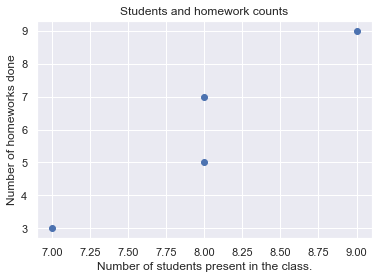

In [5]:
# Plot the data
plt.scatter(X, y)
plt.xlabel("Number of students present in the class.")
plt.ylabel("Number of homeworks done")
plt.title("Students and homework counts")
plt.show()

### -2- Manual linear regression method for one variable 

Реализуем метод линейной регрессии при помощи scipy.optimize.minimize
В роли целевой функций, которую необходимо минимизировать используем средне квадратичную ошибку.

Mean Squared Error (MSE) is the mean of the squared errors:
$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

In [6]:
def mse(param):
    """MSE function for use in scipy.optimize.minimize"""
    #Linear equation Y_hat = kx + b, k = param[0] and b = param[1]
    Y_hat = param[0] * X + param[1]
    return np.sum(pow((y - Y_hat), 2) / len(X))

In [7]:
# OptimizeResult
min_mse = minimize(fun=mse, x0=[0, 0])
min_mse.x

array([  3.00000595, -18.00004802])

In [8]:
# Linear equation Y_hat = kx + b

k = min_mse.x[0]    # slope
b = min_mse.x[1]    # intersection

Y_hat = k * X + b

print(f"Linear regression equation (using scipy.optimize.minimize): \nY_hat = {k:.2f} * X {b:.2f}")

Linear regression equation (using scipy.optimize.minimize): 
Y_hat = 3.00 * X -18.00


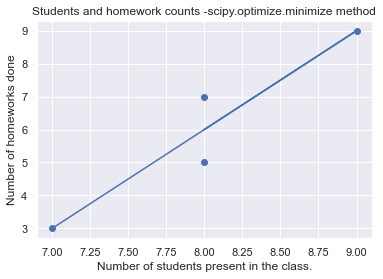

In [9]:
# Plot the data
plt.scatter(X, y)
plt.plot(X, Y_hat)

plt.xlabel("Number of students present in the class.")
plt.ylabel("Number of homeworks done")
plt.title("Students and homework counts -scipy.optimize.minimize method")

plt.show()

### -3- Linear regression method using linear_model from sklearn library

In [10]:
# Instantiate a classifer and train it
linear_model = LinearRegression()
linear_model.fit(X.reshape(-1, 1), y)

LinearRegression()

In [11]:
# Linear equation Y_hat = kx + b

k = float(linear_model.coef_)      # slope
b = linear_model.intercept_        # intersection

Y_hat = k * X + b

print(f"Linear regression equation (using linear_model.LinearRegression): \nY_hat = {k:.2f} * X + ({b:.2f})")

Linear regression equation (using linear_model.LinearRegression): 
Y_hat = 3.00 * X + (-18.00)


In [12]:
# Model performance evaluation 
linear_model.score(X.reshape(-1, 1), y)

0.9

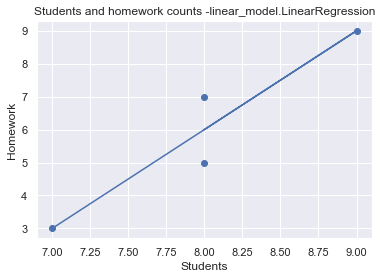

In [13]:
# Plot the data
plt.scatter(X, y)
plt.plot(X, Y_hat)
plt.xlabel("Students")
plt.ylabel("Homework")
plt.title("Students and homework counts -linear_model.LinearRegression")
plt.show()

In [14]:
# Использование методов scipy.optimize.minimize и linear_model.LinearRegression дали одинаковые значения коэффициетов модели.

# Linear regression equation (using scipy.optimize.minimize): 
# Y_hat = 3.00 * X -18.00

# Linear regression equation (using linear_model.LinearRegression): 
# Y_hat = 3.00 * X + (-18.00)
# score (r2) - 0.9

# Несмотря на высокую оценку, данный набор данных (слишком мало сэмплов) не позволяет точно предсказать количество выполненных домашних задании.

### -4- Ridge and Lasso method using linear_model from sklearn library

In [15]:
# Ridge regression model

Гребневая регрессия (L2-регуляризация/Ridge regression) – наложение штрафа на сумму квадратов коэффициентов модели. 

In [16]:
"""
Для данного сета оптимальные коэффициентом будет 0, но при 0 ridge и lasso будут работать как LinearRegression(),
примем допущение что оптимальных является коэффициент в диапазоне 0.1 и 1.
Аналогично поступим и далее при вычислений Ridge and Lasso
"""

# Подберем коэффициент alpha
# Возмем 10 значений в диапазоне 0.1 - 10
for a in range(1, 11, 1):
    ridge_model = Ridge(alpha=a/10)
    ridge_model.fit(X.reshape(-1, 1), y)
    print(a/10, " --> ", ridge_model.score(X.reshape(-1, 1), y))

0.1  -->  0.8979591836734694
0.2  -->  0.8925619834710743
0.3  -->  0.8846880907372402
0.4  -->  0.875
0.5  -->  0.8639999999999999
0.6  -->  0.8520710059171597
0.7  -->  0.839506172839506
0.8  -->  0.8265306122448979
0.9  -->  0.8133174791914388
1.0  -->  0.8


In [17]:
# Выберем коэффициент alpha=0.1 при котором оценка модели является максимальной score=0.8979

In [18]:
# Instantiate a classifer and set Regularization strength
ridge_model = Ridge(alpha=0.1)
# Fit Ridge regression model.
ridge_model.fit(X.reshape(-1, 1), y)

Ridge(alpha=0.1)

In [19]:
# Linear equation Y_hat = kx + b

k = float(ridge_model.coef_)      # slope
b = ridge_model.intercept_ # intersection

Y_hat = k * X + b

print(f"Linear regression equation (using linear_model.Ridge): \nY_hat = {k:.2f} * X + ({b:.2f})")

Linear regression equation (using linear_model.Ridge): 
Y_hat = 2.86 * X + (-16.86)


In [20]:
# Model performance evaluation 
ridge_model.score(X.reshape(-1, 1), y)

0.8979591836734694

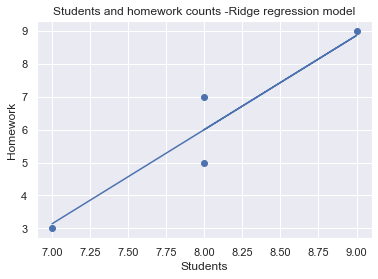

In [21]:
# Plot the data
plt.scatter(X, y)
plt.plot(X, Y_hat)
plt.xlabel("Students")
plt.ylabel("Homework")
plt.title("Students and homework counts -Ridge regression model")
plt.show()

In [22]:
# Lasso regression model

Лассо-регрессия (L1-регуляризация/Lasso regression) – наложение штрафа на сумму абсолютных значений коэффициентов регрессии.

In [23]:
# Подберем коэффициент alpha
# Возмем 10 значений в диапазоне 0.1 - 10
for a in range(1, 11, 1):
    lasso_model = Lasso(alpha=a/10)
    lasso_model.fit(X.reshape(-1, 1), y)
    print(a/10, " --> ", lasso_model.score(X.reshape(-1, 1), y))

0.1  -->  0.896
0.2  -->  0.8840000000000001
0.3  -->  0.8639999999999999
0.4  -->  0.8359999999999999
0.5  -->  0.8
0.6  -->  0.756
0.7  -->  0.704
0.8  -->  0.6440000000000001
0.9  -->  0.5759999999999998
1.0  -->  0.5


In [24]:
# Выберем коэффициент alpha=0.1 при котором оценка модели является максимальной score=0.896

In [25]:
# Instantiate a classifer and set 
# alpha (Constant that multiplies the L1 term, is equivalent to an ordinary least square)
lasso_model = Lasso(alpha=0.1)
# Fit model with coordinate descent.
lasso_model.fit(X.reshape(-1, 1), y)

Lasso(alpha=0.1)

In [26]:
# Linear equation Y_hat = kx + b

k = float(lasso_model.coef_)      # slope
b = lasso_model.intercept_ # intersection

Y_hat = k * X + b

print(f"Linear regression equation (using linear_model.Lasso): \nY_hat = {k:.2f} * X + ({b:.2f})")

Linear regression equation (using linear_model.Lasso): 
Y_hat = 2.80 * X + (-16.40)


In [27]:
# Model performance evaluation 
lasso_model.score(X.reshape(-1, 1), y)

0.896

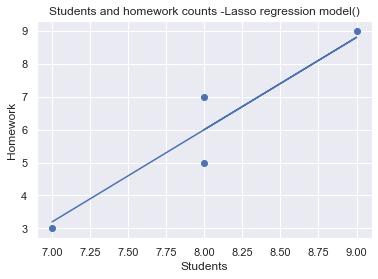

In [28]:
# Plot the data
plt.scatter(X, y)
plt.plot(X, Y_hat)
plt.xlabel("Students")
plt.ylabel("Homework")
plt.title("Students and homework counts -Lasso regression model()")
plt.show()

In [29]:
# Ridge regression и Lasso regression дали схожие оценки с LinearRegression, хотя в теории на малом количестве сэмплов они должны давать результаты лутчше.

Ridge regression и Lasso regression применяются для устранения переобучения Linear Regression путем наложения штрафов на значения параметров модели.
* Гребневая регрессия (L2-регуляризация/Ridge regression) – наложение штрафа на сумму квадратов коэффициентов модели (Используется если важны все признаки датасета). 
* Лассо-регрессия (L1-регуляризация/Lasso regression) – наложение штрафа на сумму абсолютных значений коэффициентов регрессии (Используется если важны лишь некоторые признаки).


### -5- Manual linear regression method for two variable 

In [30]:
# load the data and turn X and y into numpy arrays
# В данном занятии не будем разбивать данные на тренировочные и тестовые

# inputs / Массив X, содержит признаки для обучения (number students, complexity task).
X = hw[["number students", "complexity task"]].values 
# outputs / Массив у с целевой переменной (homework done).
y = hw["homework done"].values   

In [31]:
# Type X and y
type(X), type(y)

(numpy.ndarray, numpy.ndarray)

In [32]:
# scipy.optimize.minimize

In [33]:
def m_mse(param):
    """MSE function for use in scipy.optimize.minimize"""
    #Linear equation Y_hat = kx + b, k = param[0] and b = param[1]
    Y_hat = param[0] * X[:,0] + param[1] * X[:,1] + param[2]
    return np.sum(pow((y - Y_hat), 2) / len(X))

In [34]:
# OptimizeResult
m_min_mse = minimize(fun=m_mse, x0=[0, 0, 0])
m_min_mse.x

array([  3.6666654 ,   0.06666658, -24.99998768])

In [35]:
m_min_mse.x

array([  3.6666654 ,   0.06666658, -24.99998768])

In [36]:
# Linear equation Y_hat = k0x0 + k1x1 + b

k0 = m_min_mse.x[0]      # slope
k1 = m_min_mse.x[1]      # slope

b = m_min_mse.x[2] # intersection

Y_hat = k0 * X[:,0] + k1 * X[:,1] + b

### -6- Linear regression method for two variable using linear_model from sklearn library

In [37]:
# Instantiate a classifer and train it
m_linear_model = LinearRegression()
m_linear_model.fit(X, y)

LinearRegression()

In [38]:
m_linear_model.coef_, m_linear_model.intercept_

(array([3.66666667, 0.06666667]), -25.000000000000004)

In [39]:
# Linear equation Y_hat = k0x0 + k1x1 + b

k0 = m_linear_model.coef_[0]      # slope
k1 = m_linear_model.coef_[1]      # slope

b = m_linear_model.intercept_ # intersection

Y_hat = k0 * X[:,0] + k1 * X[:,1] + b

In [40]:
# Model performance evaluation 
m_linear_model.score(X, y)

0.9666666666666667

### -7- Ridge and Lasso method for two variable using linear_model from sklearn library

In [41]:
# Ridge regression model

In [42]:
# Подберем коэффициент alpha
# Возмем 10 значений в диапазоне 0.1 - 10
for a in range(1, 11, 1):
    m_ridge_model = Ridge(alpha=a/10)
    m_ridge_model.fit(X, y)
    print(a/10, " --> ", m_ridge_model.score(X, y))

0.1  -->  0.9618877203150427
0.2  -->  0.950187659684293
0.3  -->  0.9343737236279386
0.4  -->  0.9162170197999713
0.5  -->  0.8968500240425563
0.6  -->  0.8770023170627761
0.7  -->  0.8571443894647742
0.8  -->  0.8375775172935738
0.9  -->  0.8184911156027692
1.0  -->  0.7999999999999998


In [43]:
# Выберем коэффициент alpha=0.1 при котором оценка модели является максимальной score=0.9618

In [44]:
# Instantiate a classifer and set Regularization strength
m_ridge_model = Ridge(alpha=0.1)
# Fit Ridge regression model.
m_ridge_model.fit(X, y)

Ridge(alpha=0.1)

In [45]:
m_ridge_model.coef_, m_ridge_model.intercept_

(array([3.38444503, 0.05536673]), -22.459728395441456)

In [46]:
# Linear equation Y_hat = k0x0 + k1x1 + b

k0 = m_ridge_model.coef_[0]      # slope
k1 = m_ridge_model.coef_[1]      # slope

b = m_ridge_model.intercept_ # intersection

Y_hat = k0 * X[:,0] + k1 * X[:,1] + b

In [47]:
# Model performance evaluation 
m_ridge_model.score(X, y)

0.9618877203150427

In [48]:
# Lasso regression model

In [49]:
# Подберем коэффициент alpha
# Возмем 10 значений в диапазоне 0.1 - 10
for a in range(1, 11, 1):
    m_lasso_model = Lasso(alpha=a/10)
    m_lasso_model.fit(X, y)
    print(a/10, " --> ", m_lasso_model.score(X, y))

0.1  -->  0.9594343281860872
0.2  -->  0.9377518568831567
0.3  -->  0.9016081265189915
0.4  -->  0.8510181885884077
0.5  -->  0.8
0.6  -->  0.7449267988677367
0.7  -->  0.6648388803560363
0.8  -->  0.5724361155379537
0.9  -->  0.46772164525240456
1.0  -->  0.350675256571235


In [50]:
# Выберем коэффициент alpha=0.1 при котором оценка модели является максимальной score=0.9594

In [51]:
# Instantiate a classifer and set 
# alpha (Constant that multiplies the L1 term, is equivalent to an ordinary least square)
m_lasso_model = Lasso(alpha=0.1)
# Fit model with coordinate descent.
m_lasso_model.fit(X, y)

Lasso(alpha=0.1)

In [52]:
m_lasso_model.coef_, m_lasso_model.intercept_

(array([3.31986369, 0.05199455]), -21.858773166080006)

In [53]:
# Linear equation Y_hat = k0x0 + k1x1 + b

k0 = m_lasso_model.coef_[0]      # slope
k1 = m_lasso_model.coef_[1]      # slope

b = m_lasso_model.intercept_ # intersection

Y_hat = k0 * X[:,0] + k1 * X[:,1] + b

In [54]:
# Model performance evaluation 
m_lasso_model.score(X, y)

0.9594343281860872

In [55]:
# Добавление дополнительных признаков позволяет улутчить качество модели.